In [25]:
import numpy as np
import pandas as pd
import hiplot as hip
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'hiplot'

In [ ]:

data = [{'data_name': "Tox21", 'data_count': 7831, 'lr':9e-6, 'total number update': 25000, "warmup update": 3000, 'loss': 0.822},
        {'data_name': "Tox21", 'data_count': 7831, 'lr':5e-8, 'total number update': 25000, "warmup update": 3000, 'loss': 0.499},
        {'data_name': "Tox21", 'data_count': 7831, 'lr':3e-7, 'total number update': 25000, "warmup update": 3000, 'loss': 0.5}]


In [ ]:
sider = pd.read_csv("/home/gayane/BartLM/Bart/chemical/evaluation_data/sider/sider/results.csv", sep=',', on_bad_lines='skip')
sider_list = sider.to_dict('records')

In [ ]:
# sider.drop("Unnamed: 1")
# sider.columns

In [ ]:
# exp = hip.Experiment.from_iterable(sider_list)

# exp.colormap = "schemeSpectral"
# exp.display(store_state_key="cell1")

In [ ]:
siderSWA = pd.read_csv("/home/gayane/BartLM/Bart/chemical/evaluation_data/sider/sider/SWA_results.csv", sep=',', on_bad_lines='skip')
siderSWA_list = siderSWA.to_dict('records')

In [ ]:
# exp = hip.Experiment.from_iterable(siderSWA_list)

# exp.colormap = "schemeSpectral"
# exp.display(store_state_key="cell1")

In [ ]:

data_name = [      "PCBA", "MUV", "HIV", "BACE", "BBBP", "Tox21", "ToxCast", "SIDER", "CleanTox"]
data_count = [      437929, 93087, 41127, 1513,   2039,   7831,    8575,      1427,    1478]
data_label_count = [128,    17,    1,      1,      1,     12,      617,       27,      2]
diff_score = [(0.878+1), (0.886+1), (0.053+1), (0.587+1), (0+0.1), (0.035+1), (0.737+1), (0.171+1), (-0.036+0.5)]

Text(0.5, 0, 'Logarithm of dataset lenght count')

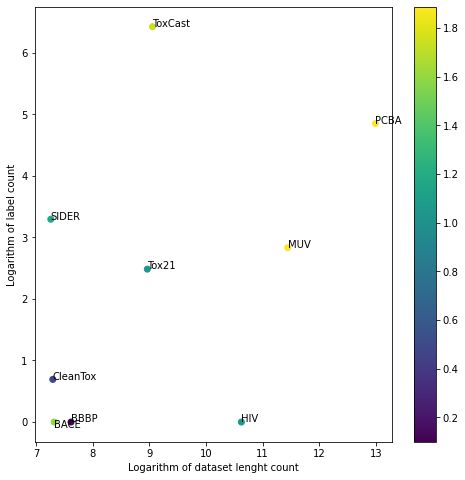

In [ ]:
N = len(data_count)
# cmap = plt.get_cmap('jet')
# norm = plt.Normalize(0, 400)

# color = cmap(norm(200.))
# colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2 

# plt.scatter(data_count, data_label_count, s=50, cmap='viridis')
# plt.show()

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(np.log(data_count), np.log(data_label_count), c=diff_score)
for i, txt in enumerate(data_name):
    ax.annotate(txt, (np.log(data_count[i]), np.log(data_label_count[i])- (0.1 if txt=='BACE' else 0)))
# plt.title("title")
plt.colorbar()
plt.ylabel("Logarithm of label count")
plt.xlabel("Logarithm of dataset lenght count")

In [ ]:
import os
directory_list = list()
for root, dirs, files in os.walk("/mnt/good/gayane/data/chkpt", topdown=False):
    for name in dirs:
        if "BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757" in name and "normal" in name and "r3f" in name: 
            print(name)

            path = os.path.join(root, name)
            print(path)
            os.system(f"rm -rf {path}")
            # os.system(f"rm -rf {path}/checkpoint1* {path}/checkpoint2* {path}/checkpoint3* {path}/checkpoint4* {path}/checkpoint5* {path}/checkpoint6* {path}/checkpoint7* {path}/checkpoint8* {path}/checkpoint9*  {path}/checkpoint.best_loss*")
# rm -rf checkpoint1* checkpoint2* checkpoint3* checkpoint4* checkpoint5* checkpoint6* checkpoint7* checkpoint8* checkpoint9*  checkpoint.best_loss*")


BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_5.0
/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_5.0
BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_0.5
/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_0.5
BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_0.1
/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_0.1
BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_1.0
/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.3_lr_1e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_1.0


In [ ]:
import os
directory_list = list()
for root, dirs, files in os.walk("/mnt/good/gayane/data/chkpt", topdown=False):
    for name in dirs:
        path = os.path.join(root, name)

        os.system(f"mv {path}/*.log /home/gayane/BartLM/fairseq")


In [ ]:
import os
directory_list = list()
for root, dirs, files in os.walk("/mnt/good/gayane/data/chkpt", topdown=False):
    for name in dirs:
        # if "Tox21" not in name: 
        #     # print("skip")
        #     continue


        path = os.path.join(root, name)
        os.system(f"rm -rf {path}/checkpoint_last* {path}/checkpoint.best_loss*")


In [ ]:
import numpy as np
from git import typ
import pandas as pd 
from rdkit import Chem
from sklearn.model_selection import train_test_split


dataset_name = "Ames"
smiles_col_name = "Canonical_Smiles"
label_col_name = "Activity"

path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/{dataset_name}/"

print(path)
print (f"{path}{dataset_name}.csv")
df = pd.read_csv(f"{path}{dataset_name}.csv")
d = {"SMILES": df[smiles_col_name], "Classification": df[label_col_name] }
df = pd.DataFrame(d) 
print(df.columns, df.shape)
print(df.head())

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/
/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/Ames.csv
Index(['SMILES', 'Classification'], dtype='object') (6512, 2)
                                              SMILES  Classification
0  O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7cccc...               0
1                              NNC(=O)CNC(=O)\C=N\#N               1
2                           O=C1NC(=O)\C(=N/#N)\C=N1               1
3                               NC(=O)CNC(=O)\C=N\#N               1
4             CCCCN(CC(O)C1=C\C(=N/#N)\C(=O)C=C1)N=O               1


In [ ]:
a = Chem.MolFromSmiles(df.values[1][0])

RDKit ERROR: [16:17:39] SMILES Parse Error: syntax error while parsing: NNC(=O)CNC(=O)\C=N\#N
RDKit ERROR: [16:17:39] SMILES Parse Error: Failed parsing SMILES 'NNC(=O)CNC(=O)\C=N\#N' for input: 'NNC(=O)CNC(=O)\C=N\#N'


In [ ]:
print(a)

None


In [ ]:
# z = 0
# heavy_at = ["Ti", "V", "Cr", "Mn", "Fe", "Co", 
# "Ni",  "Cu", "Zn", "Ga", "Ge", "As", "Zr", "Nb", "Mo", "Tc", "Ru", "Rh", "Pd", "Ag", 
# "Cd", "In", "Sn", "Te", "Lu", "Hf", "Ta", "W", "Re","Os", "Ir", "Pt", "Au", "Hg", 
# "Tl", "Pb", "Bi", "Po", "At", "La", "Ce", "Pr", "Nd", "Pm", "Sm", "Eu", "Gd", "Tb", 
# "Dy", "Ho", "Tm", "Yb", "Pa", "Ac", "Th", "U", "Np", "Pu", "Am", "Bk", "Cm", "Cf", "Es", 
# "Fm", "No", "Ra", "Lr", "Rf", "Db", "Sg", "Bh", "Hs", "Mt"]
# smiles_heavy = []
# heavy = []
# for i in df.values[:,0]:
#     for h in heavy_at:
#         if i in h or i.lower().replace("cl","").count("c")<3:
#             smiles_heavy.append(i)
#             heavy.append(h)
#             # print(h, i)
#             break
# print(len(set(smiles_heavy)))
# print(heavy)

   


In [ ]:
# m = Chem.MolFromSmiles("O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7ccccc7C(=O)c6c8[nH]c9c%10C(=O)c%11ccccc%11C(=O)c%10ccc9c8c45
# NNC(=O)CNC(=O)\C=N\#N")


In [ ]:
df.values[:,0]

array(['O=C1c2ccccc2C(=O)c3c1ccc4c3[nH]c5c6C(=O)c7ccccc7C(=O)c6c8[nH]c9c%10C(=O)c%11ccccc%11C(=O)c%10ccc9c8c45',
       'NNC(=O)CNC(=O)\\C=N\\#N', 'O=C1NC(=O)\\C(=N/#N)\\C=N1', ...,
       'COC(=O)Nc1nc2ccccc2[nH]1', 'ClCc1cccc2c3cccc4cccc(c12)c34',
       'CCCN(CCC)N=O'], dtype=object)

In [ ]:
import numpy as np
from git import typ
import pandas as pd 
from rdkit import Chem
from sklearn.model_selection import train_test_split


dataset_name = "Ames"
smiles_col_name = "Canonical_Smiles"
label_col_name = "Activity"

path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/{dataset_name}/"

print(path)
print (f"{path}valid_{dataset_name}.csv")
df = pd.read_csv(f"{path}valid_{dataset_name}.csv")
print()
d = {"SMILES": df[smiles_col_name], "Classification": df[label_col_name] }
df = pd.DataFrame(d) 
print(df.columns, df.shape)
print(df)

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/
/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/valid_Ames.csv

Index(['SMILES', 'Classification'], dtype='object') (651, 2)
                                                SMILES  Classification
0                                          CCCC(=C)C=O               1
1                            FC1=CN(C2CCCO2)C(=O)NC1=O               0
2                           CC(=O)OCc1cocc2c(C=O)ccc12               1
3                                         OC(=O)C(=O)O               0
4    CC(\C=C\C(O)C1CC1)C2CCC3\C(=C\C=C\4/CC(O)CC(O)...               0
..                                                 ...             ...
646                 CC(=O)ON(C(=O)C)c1ccc(cc1)c2ccccc2               1
647            CCN1C=C(C(=O)O)C(=O)c2cnc(nc12)N3CCNCC3               1
648                           Fc1ccc(F)c2c1ccc3cccnc23               1
649                                           OCCN1CC1              

In [ ]:
dataset_name = "japan"
smiles_col_name = "SMILES"
label_col_name = "Classification"
path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/"

print (f"{path}{dataset_name}.csv")
df_ = pd.read_csv(f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/japan/japan_.csv")
d_ = {"SMILES": df_[smiles_col_name], "Classification": df_[label_col_name] }
df_ = pd.DataFrame(d_) 
print(df_.columns, df.shape)
print(df_)

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/japan/japan.csv
Index(['SMILES', 'Classification'], dtype='object') (651, 2)
                                                SMILES  Classification
0    CC(=O)NC1=C(C=CC(=C1)N(CCOC(=O)C)CCOC(=O)C)N=N...               1
1    C1=CC=C(C=C1)CCN(CCC#N)C2=CC=C(C=C2)N=NC3=C(C=...               1
2    [O-][N+](=O)c2ccc(/N=N/c1ccc(N(CCOC(=O)C)CCC#N...               1
3                                      COC(=O)C(CCl)Cl               1
4                              COC(=O)C(CSC(=N)N)Cl.Cl               1
..                                                 ...             ...
667                                      COC(C(=O)OC)O               1
668   CCOC(=O)C1=C(SC(=C1C)C2=CC=C(C=C2)[N+](=O)[O-])N               1
669                CC(C)(C(=O)C1=CC=C(C=C1)Cl)N2CCOCC2               1
670                        CS(=O)(=O)OCC1COS(=O)(=O)O1               1
671                          C1[C@H](O1)COCC2=CC=CC=C2               1

[672 row

In [ ]:
df

,SMILES,Classification
0,CCCC(=C)C=O,1
1,FC1=CN(C2CCCO2)C(=O)NC1=O,0
2,CC(=O)OCc1cocc2c(C=O)ccc12,1
3,OC(=O)C(=O)O,0
4,CC(\C=C\C(O)C1CC1)C2CCC3\C(=C\C=C\4/CC(O)CC(O)...,0
...,...,...
646,CC(=O)ON(C(=O)C)c1ccc(cc1)c2ccccc2,1
647,CCN1C=C(C(=O)O)C(=O)c2cnc(nc12)N3CCNCC3,1
648,Fc1ccc(F)c2c1ccc3cccnc23,1
649,OCCN1CC1,1


In [ ]:
df_diff = pd.concat([df['SMILES'],df_['SMILES']]).drop_duplicates(keep=False)
df_diff

0                                            CCCC(=C)C=O
1                              FC1=CN(C2CCCO2)C(=O)NC1=O
2                             CC(=O)OCc1cocc2c(C=O)ccc12
3                                           OC(=O)C(=O)O
4      CC(\C=C\C(O)C1CC1)C2CCC3\C(=C\C=C\4/CC(O)CC(O)...
                             ...                        
667                                        COC(C(=O)OC)O
668     CCOC(=O)C1=C(SC(=C1C)C2=CC=C(C=C2)[N+](=O)[O-])N
669                  CC(C)(C(=O)C1=CC=C(C=C1)Cl)N2CCOCC2
670                          CS(=O)(=O)OCC1COS(=O)(=O)O1
671                            C1[C@H](O1)COCC2=CC=CC=C2
Name: SMILES, Length: 1323, dtype: object

In [ ]:
pd.concat([df['SMILES'],df_['SMILES']])

0                                            CCCC(=C)C=O
1                              FC1=CN(C2CCCO2)C(=O)NC1=O
2                             CC(=O)OCc1cocc2c(C=O)ccc12
3                                           OC(=O)C(=O)O
4      CC(\C=C\C(O)C1CC1)C2CCC3\C(=C\C=C\4/CC(O)CC(O)...
                             ...                        
667                                        COC(C(=O)OC)O
668     CCOC(=O)C1=C(SC(=C1C)C2=CC=C(C=C2)[N+](=O)[O-])N
669                  CC(C)(C(=O)C1=CC=C(C=C1)Cl)N2CCOCC2
670                          CS(=O)(=O)OCC1COS(=O)(=O)O1
671                            C1[C@H](O1)COCC2=CC=CC=C2
Name: SMILES, Length: 1323, dtype: object

In [ ]:
from toxometris.tools import molecule
import numpy as np
from git import typ
import pandas as pd 
from rdkit import Chem
from sklearn.model_selection import train_test_split


dataset_name = "Ames"
smiles_col_name = "Canonical_Smiles"
label_col_name = "Activity"

path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/{dataset_name}/"

print(path)
print (f"{path}train_{dataset_name}.csv")
df = pd.read_csv(f"{path}train_{dataset_name}.csv")
print()
d = {"SMILES": df[smiles_col_name], "Classification": df[label_col_name] }
df = pd.DataFrame(d) 
print(df.columns, df.shape)
print(df)

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/
/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/Ames/Ames/train_Ames.csv

Index(['SMILES', 'Classification'], dtype='object') (5209, 2)
                                        SMILES  Classification
0          Oc1ccc2C(=O)c3cccc4c(O)ccc(c2c1)c34               1
1        Cc1ccc2nc3c4C=CC(O)C(O)c4ccc3c(C)c2c1               1
2                                    CC(=O)C=O               1
3                  COC(=O)C1=C(C)C(OC1=O)C(C)C               1
4                     OC(=O)CCc1c[nH]c2ccccc12               0
...                                        ...             ...
5204                  OC(=O)CCCc1ccc(NCCCl)cc1               1
5205          OC(=O)\C(=C(\C(Cl)Cl)/C(=O)O)\Cl               1
5206                                  Cc1ccsc1               0
5207     CN1CCN(CC1)C2=Nc3cc(Cl)ccc3Nc4ccccc24               0
5208  CC#CC(OC(=O)NC1CCCCC1)(c2ccccc2)c3ccccc3               1

[5209 rows x 2 colum

In [ ]:
# Ames_df = molecule.MoleculeHelper.add_molecular_property_to_df(df, 'SMILES', 'InChIKey')

In [ ]:
test_df

,SMILES,Classification,InChIKey
0,CCCC(=C)C=O,1,RTTWLTLNKLTUJR-UHFFFAOYSA-N
1,FC1=CN(C2CCCO2)C(=O)NC1=O,0,WFWLQNSHRPWKFK-UHFFFAOYSA-N
2,CC(=O)OCc1cocc2c(C=O)ccc12,1,QIUOVIRIFZOCLL-UHFFFAOYSA-N
3,OC(=O)C(=O)O,0,MUBZPKHOEPUJKR-UHFFFAOYSA-N
4,CC(\C=C\C(O)C1CC1)C2CCC3\C(=C\C=C\4/CC(O)CC(O)...,0,LWQQLNNNIPYSNX-UHFFFAOYSA-N
...,...,...,...
646,CC(=O)ON(C(=O)C)c1ccc(cc1)c2ccccc2,1,UJDATCBZIHYYMW-UHFFFAOYSA-N
647,CCN1C=C(C(=O)O)C(=O)c2cnc(nc12)N3CCNCC3,1,JOHZPMXAZQZXHR-UHFFFAOYSA-N
648,Fc1ccc(F)c2c1ccc3cccnc23,1,GOCFEAGEPBLXRZ-UHFFFAOYSA-N
649,OCCN1CC1,1,VYONOYYDEFODAJ-UHFFFAOYSA-N


In [ ]:
dataset_name = "japan"
smiles_col_name = "SMILES"
label_col_name = "Classification"
path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/"

print (f"{path}{dataset_name}.csv")
df_ = pd.read_csv(f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/japan/japan_.csv")
# d_ = {"SMILES": df_[smiles_col_name], "Classification": df_[label_col_name] }
# df_ = pd.DataFrame(df_) 
# print(df_.columns, df.shape)
# print(df_)

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/japan/japan.csv


In [ ]:
japan_df = molecule.MoleculeHelper.add_molecular_property_to_df(df_, 'SMILES', 'InChIKey')

100%|██████████| 672/672 [00:00<00:00, 1479.80it/s]

Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False)
    MolToSmiles(RDKit::ROMol mol, RDKit::SmilesWriteParams params)


In [ ]:
len(set(japan_df['InChIKey']))

670

In [ ]:
ames_unique = []
japan_unique = []
am = set(Ames_df['InChIKey'])
jap = set(japan_df['InChIKey'])
ames_interseq = [i for i in Ames_df['InChIKey'] if i in jap]
japan_interseq = [i for i in japan_df['InChIKey'] if i in am]


In [ ]:
ames_interseq, japan_interseq

([nan,
  'LTNYDSMDSLOMSM-UHFFFAOYSA-N',
  'TUIUTESNLKHOHQ-UHFFFAOYSA-N',
  'HSTOKWSFWGCZMH-UHFFFAOYSA-N'],
 ['HSTOKWSFWGCZMH-UHFFFAOYSA-N',
  'LTNYDSMDSLOMSM-UHFFFAOYSA-N',
  'TUIUTESNLKHOHQ-UHFFFAOYSA-N',
  nan])

In [ ]:
dataset_name = "japan"
smiles_col_name = "SMILES"
label_col_name = "Classification"
path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/snyder_negatives_451/snyder_negatives_451/snyder_negatives_451.csv"

print (f"{path}")
df_ = pd.read_csv(f"{path}")

synder_df = molecule.MoleculeHelper.add_molecular_property_to_df(df_, 'SMILES', 'InChIKey')

/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/snyder_negatives_451/snyder_negatives_451/snyder_negatives_451.csv


  0%|          | 0/451 [00:00<?, ?it/s]RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [18:42:38] WARNING: not removing hydrogen atom without neighbors
 

In [ ]:
am = set(Ames_df['InChIKey'])
jap = set(synder_df['InChIKey'])
ames_interseq = [i for i in Ames_df['InChIKey'] if i in jap]
synder_interseq = [i for i in synder_df['InChIKey'] if i in am]

In [ ]:
synder_interseq, ames_interseq

(['GOEMGAFJFRBGGG-UHFFFAOYSA-N',
  'OFCNXPDARWKPPY-UHFFFAOYSA-N',
  'PAZJSJFMUHDSTF-UHFFFAOYSA-N',
  'UUVWYPNAQBNQJQ-UHFFFAOYSA-N',
  'KBOPZPXVLCULAV-UHFFFAOYSA-N',
  'KRMDCWKBEZIMAB-UHFFFAOYSA-N',
  'SGRYPYWGNKJSDL-UHFFFAOYSA-N',
  'METKIMKYRPQLGS-UHFFFAOYSA-N',
  'XUKUURHRXDUEBC-UHFFFAOYSA-N',
  'OMPJBNCRMGITSC-UHFFFAOYSA-N',
  'UREBDLICKHMUKA-UHFFFAOYSA-N',
  'RYYVLZVUVIJVGH-UHFFFAOYSA-N',
  'OFZCIYFFPZCNJE-UHFFFAOYSA-N',
  'WIIZWVCIJKGZOK-UHFFFAOYSA-N',
  'WDFKMLRRRCGAKS-UHFFFAOYSA-N',
  'KPSRODZRAIWAKH-UHFFFAOYSA-N',
  'CXOXHMZGEKVPMT-UHFFFAOYSA-N',
  'KNHUKKLJHYUCFP-UHFFFAOYSA-N',
  'GJSURZIOUXUGAL-UHFFFAOYSA-N',
  'OROGSEYTTFOCAN-UHFFFAOYSA-N',
  'PMATZTZNYRCHOR-UHFFFAOYSA-N',
  'JJCFRYNCJDLXIK-UHFFFAOYSA-N',
  'MQJKPEGWNLWLTK-UHFFFAOYSA-N',
  'UREBDLICKHMUKA-UHFFFAOYSA-N',
  'AAOVKJBEBIDNHE-UHFFFAOYSA-N',
  'DCOPUUMXTXDBNB-UHFFFAOYSA-N',
  'ZZVUWRFHKOJYTH-UHFFFAOYSA-N',
  'AUZONCFQVSMFAP-UHFFFAOYSA-N',
  'HCFDWZZGGLSKEP-UHFFFAOYSA-N',
  'ULGZDMOVFRHVEP-UHFFFAOYSA-N',
  'BFPYWID

In [ ]:
def generate_scaff(smiles: str, include_chirality: bool = False) -> str:
  """Compute the Bemis-Murcko scaffold for a SMILES string.

  Bemis-Murcko scaffolds are described in DOI: 10.1021/jm9602928.
  They are essentially that part of the molecule consisting of
  rings and the linker atoms between them.

  Paramters
  ---------
  smiles: str
    SMILES
  include_chirality: bool, default False
    Whether to include chirality in scaffolds or not.

  Returns
  -------
  str
    The MurckScaffold SMILES from the original SMILES

  References
  ----------
  .. [1] Bemis, Guy W., and Mark A. Murcko. "The properties of known drugs.
     1. Molecular frameworks." Journal of medicinal chemistry 39.15 (1996): 2887-2893.

  Note
  ----
  This function requires RDKit to be installed.
  """
  try:
    from rdkit import Chem
    from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
  except ModuleNotFoundError:
    raise ImportError("This function requires RDKit to be installed.")

  mol = Chem.MolFromSmiles(smiles)
  scaffold = MurckoScaffoldSmiles(mol=mol, includeChirality=include_chirality)
  return scaffold

# Caffeine

In [ ]:
generate_scaff("CN1C=NC2=C1C(=O)N(C(=O)N2C)C")

'O=c1[nH]c(=O)c2[nH]cnc2[nH]1'

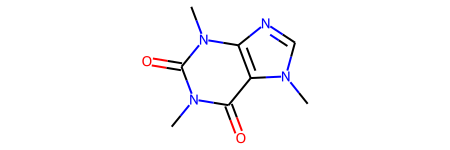

In [ ]:
Chem.MolFromSmiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

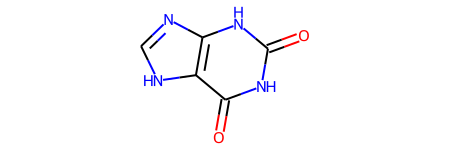

In [ ]:
Chem.MolFromSmiles("O=c1[nH]c(=O)c2[nH]cnc2[nH]1")

# Adenine

In [ ]:
generate_scaff("NC1=NC=NC2=C1N=CN2 Nc1c2ncNc2ncn1")

'c1ncc2nc[nH]c2n1'

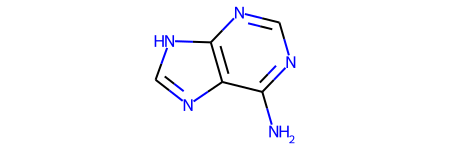

In [ ]:
Chem.MolFromSmiles("NC1=NC=NC2=C1N=CN2 Nc1c2ncNc2ncn1")

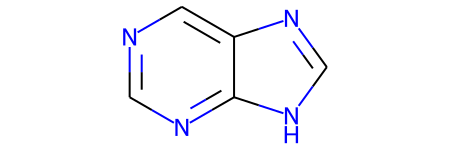

In [ ]:
Chem.MolFromSmiles("c1ncc2nc[nH]c2n1")

# Guanine

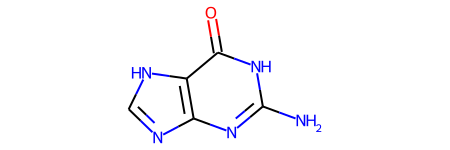

In [ ]:
Chem.MolFromSmiles("C1=NC2=C(N1)C(=O)NC(=N2)N")

In [ ]:
# generate_scaff("C1=NC2=C(N1)C(=O)NC(=N2)N")

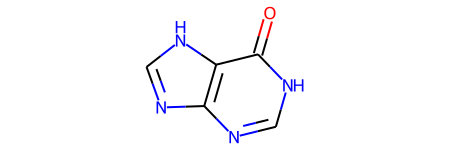

In [ ]:
Chem.MolFromSmiles("O=c1[nH]cnc2nc[nH]c12")

In [ ]:
import imp
from rdkit import Chem
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
import rdkit.Chem.Scaffolds.rdScaffoldNetwork
from rdkit.Chem.Scaffolds.rdScaffoldNetwork import BRICSScaffoldParams
from fairseq.data.data_utils import load_indexed_dataset
# from sklearn.linear_model import ridge_regression
from fairseq.models.bart import BARTModel
from fairseq.data import Dictionary
from scripts.utils import generateMurcoScaffold
import matplotlib.pyplot as plt 
import torch.nn.functional as F 
from tqdm import tqdm
import pandas as pd
import numpy as np
import torch
# import umap

import json

/home/gayane/miniconda3/envs/cptm/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-06-29 18:59:36 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


In [3]:
dataset_name = "BBBP"




In [4]:
dataset_name = 'BBBP'
# dataset = dataset_name if dataset_name in set(["BBBP", "BACE", "HIV"]) else f"{dataset_name}_{args.subtask}"
dataset = dataset_name

store_path = "/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data"
model = f"{store_path}/{dataset}/processed"

with open('/home/gayane/BartLM/captum/fairseq/scripts/datasets.json') as f:
    datasets_json = json.load(f)
dataset_js = datasets_json[dataset]
task_type = dataset_js['type']

chkpt_path = "/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.2_lr_3e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_0.5/checkpoint_best.pt"

# chkpt_path = f"/mnt/good/gayane/data/chkpt/{dataset}_bs_16_lr_{lr}_totalNum_{totNumUpdate}_warmup_{warmup}/checkpoint_last.pt"
print(chkpt_path)  # BACE_bs_16_lr_3e-5_totalNum_1135_warmup_181/ in test 
bart = BARTModel.from_pretrained(model,  checkpoint_file = chkpt_path, 
                                 bpe="sentencepiece",
                                 sentencepiece_model="/home/gayane/BartLM/Bart/chemical/tokenizer/chem.model")
bart.eval()
bart.cuda(device=1)



NameError: name 'json' is not defined

In [5]:
train_df, valid_df, test_df = generateMurcoScaffold("BACE")


NameError: name 'pd' is not defined

In [ ]:
len(set(train_df['MurckoScaffold'].values)), len(train_df)

(617, 1631)

In [ ]:
train_scaff = list(set(train_df['MurckoScaffold'].values))
import os

In [ ]:
train_df[["y","ids"]]

,y,ids
0,1.0,Fc1ccc(cc1C#CCCCF)[C@]1(N=C(N)N(C)C1=O)c1ccc(O...
1,1.0,FCC#Cc1cc(ccc1)[C@]1(N=C(N)N(C)C1=O)c1ccc(OC(F...
2,1.0,FCCC#Cc1cc(ccc1)[C@]1(N=C(N)N(C)C1=O)c1ccc(OC(...
3,1.0,FC(F)Oc1ccc(cc1)[C@@]1(N=C(N)N(C)C1=O)c1cc(ccc...
4,1.0,FC(F)Oc1ccc(cc1)[C@@]1(N=C(N)N(C)C1=O)c1cc(ccc...
...,...,...
1205,0.0,o1cc(cc1)-c1cc(ccc1)C1(N=C(N)N(C)C1=O)c1ccncc1
1206,0.0,Fc1cc(cc(F)c1)C[C@H](NC(=O)C)[C@H](O)C[NH2+]C1...
1207,0.0,Brc1ccccc1C1C[NH2+]CC1C(=O)N1CCC(CC1c1ccccc1)c...
1208,0.0,Clc1ccccc1-c1n(Cc2nc(N)ccc2)c(cc1)-c1ccc(Oc2cc...


In [ ]:
train_df[train_df['MurckoScaffold'] == train_scaff[0]][["y","ids"]]

,y,ids
669,1.0,S(CC[C@H](NC(=O)[C@@H](NC(=O)C)CC(C)C)C(=O)N[C...
670,0.0,S(CC[C@H](NC(=O)CCC(C)C)C(=O)N[C@H]([C@@H](O)C...
671,0.0,OC(C(NC(=O)C(NC(=O)C(NC(=O)C)CC(C)C)C)CC(C)C)C...
672,0.0,S(CCC(NC(=O)C(NC(=O)C)C(C)C)C(=O)NC(C(O)CC(C(=...
673,0.0,S(CCC(NC(=O)C(NC(=O)C)C)C(=O)NC(C(O)CC(C(=O)NC...


In [ ]:
path = 'mkdir /home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data'
dataset_name = "BBBP"
for i in range(617):
    df = train_df[train_df['MurckoScaffold'] == train_scaff[i]]
    os.system(f"mkdir -p {path}/{dataset_name}_{i}")
    os.system(f"mkdir -p {path}/{dataset_name}_{i}/{dataset_name}_{i}")
    # print(df[["y","ids"]])
    df[["y","ids"]].to_csv(f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}_{i}/{dataset_name}_{i}/train_{dataset_name}_{i}.csv")
    df[["y","ids"]].to_csv(f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}_{i}/{dataset_name}_{i}/valid_{dataset_name}_{i}.csv")
    df[["y","ids"]].to_csv(f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}_{i}/{dataset_name}_{i}/test_{dataset_name}_{i}.csv")
    
    print(df)

       y                                           ids MurckoScaffold
137  1.0                                       C(Cl)Cl               
138  1.0                                      CCCC(C)C               
139  1.0                                   ClCC(F)(F)F               
140  1.0  [Na+].[Na+].[Na+].[O-]C(=O)[P]([O-])([O-])=O               
141  0.0                                  NC(CO)(CO)CO               
..   ...                                           ...            ...
231  1.0          C(C([S](CC)(=O)=O)([S](CC)(=O)=O)C)C               
232  1.0                         C(C(C(N)=O)(CC)CC)C=C               
233  1.0                           C(C(C(CC)C)C(N)=O)C               
234  1.0                             C(C(CCC)C(N)=O)CC               
235  1.0                                 [N+](=[N-])=O               

[99 rows x 3 columns]
       y                                                ids  \
987  1.0             CN(C)C(=O)Cc1n2cc(C)ccc2nc1c3ccc(C)cc3   
988  1.0  C

In [ ]:
path = 'mkdir /home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data'
s = f"/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.1_lr_3e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_5.0/checkpoint_best.pt"
for i in range(1, 368):
    s= s + f",/mnt/good/gayane/data/chkpt/BACE_bs_16_dropout_0.1_lr_3e-5_totalNum_757_warmup_121_noise_type_normal_r3f_lambda_5.0/checkpoint_best.pt"
# print(s)

In [ ]:
# s

In [ ]:
# df

<AxesSubplot:>

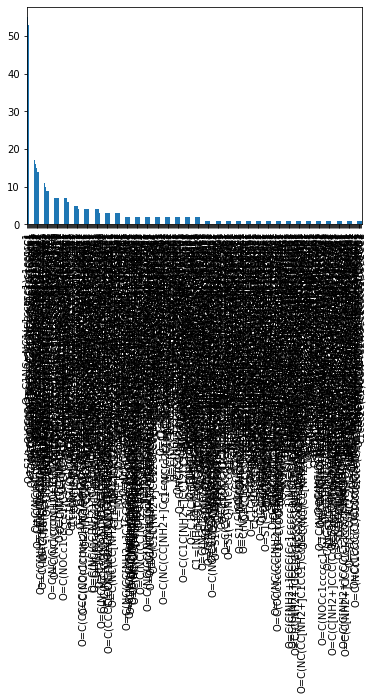

In [ ]:

train_df.MurckoScaffold.value_counts().plot(kind='bar')


In [ ]:
len(set(train_df['MurckoScaffold'].values)), len(train_df), len(set(valid_df['MurckoScaffold'].values)), len(valid_df)

(368, 1210, 151, 151)

<AxesSubplot:>

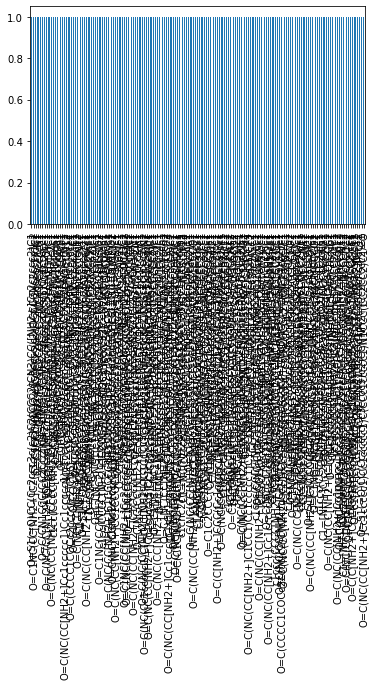

In [ ]:
valid_df.MurckoScaffold.value_counts().plot(kind='bar')


In [ ]:
if len(dataset_js["class_index"])>1:
    test_label_path = list()
    for i in range(len(dataset_js["class_index"])):
        test_label_path.append(f"{store_path}/{dataset}_{i}/processed/label/train")

else:
    test_label_path = f"{store_path}/{dataset}/processed/label/train"

if task_type == 'classification':
    target_dict = Dictionary.load(f"{store_path}/{dataset}/processed/label/dict.txt")
    targets = list(load_indexed_dataset(test_label_path, target_dict))
else:
    with open(f'{test_label_path}.label') as f:
        lines = f.readlines()
        targets = [float(x.strip()) for x in lines]

input_dict = Dictionary.load(f"{store_path}/{dataset}/processed/input0/dict.txt")
smiles = list(load_indexed_dataset(
f"{store_path}/{dataset}/processed/input0/train", input_dict))
print(smiles[0])

y_pred = []
y = []
sm = []
smi = []

for i, (smile, target) in tqdm(list(enumerate(zip(smiles, targets)))):
    smile = torch.cat((torch.cat((torch.tensor([0]), smile[:126])), torch.tensor([2]))) 
    # print(smile.size(), smile.size(dim=0))
    for i in range(smile.size(dim=0),128):
        smile = torch.cat((smile, torch.tensor([2])),0)
        
    if task_type =="classification":
        output = bart.predict('sentence_classification_head', smile)
        target = target[0].item()
        y_pred.append(output[0][1].exp().item())
        y.append(target - 4)
        smi.append(smile)
        sm.append(bart.decode(smile))
        
    elif task_type == "regression":
        output = bart.predict('sentence_classification_head', smile, return_logits=True)
        y_pred.append(output[0][0].item())
        y.append(target)


2022-06-22 12:14:30 | INFO | fairseq.data.data_utils | loaded 1,210 examples from: /home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/BACE/processed/label/train
2022-06-22 12:14:30 | INFO | fairseq.data.data_utils | loaded 1,210 examples from: /home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/BACE/processed/input0/train


tensor([222,   9,   6,  25,   7,  19,   6,   4,  50,   4,   4,   4,   4,  22,
         32,   4,  77,  14,  29,   4,   7,  14,   5,  14,   7,   4,   5,   4,
         79,   8,   5,   9,   6,  25,   7,   8,   4,   7,  22,   5,  22,   5,
         19,   6,   2])


100%|██████████| 1210/1210 [00:38<00:00, 31.50it/s]


In [ ]:
# smi = [sm.tolist() for sm in smi]
# smi

In [ ]:
# smi

In [ ]:
# enc = [bart.encode(sm).numpy() for sm in train_df['ids'].values]
# mapper = umap.UMAP().fit(enc)


In [1]:
dataset_name = 'BBBP'
# dataset = dataset_name if dataset_name in set(["BBBP", "BACE", "HIV"]) else f"{dataset_name}_{args.subtask}"
dataset = dataset_name

store_path = "/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data"
model = f"{store_path}/{dataset}/processed"

with open('/home/gayane/BartLM/captum/fairseq/scripts/datasets.json') as f:
    datasets_json = json.load(f)
dataset_js = datasets_json[dataset]
task_type = dataset_js['type']


os.system(f"mkdir -p {store_path}/{dataset}/")
os.system(f"mkdir -p {store_path}/{dataset}/processed/")
os.system(f"mkdir -p {store_path}/{dataset}/processed/input0/")
os.system(f"mkdir -p {store_path}/{dataset}/processed/label/")

# warmup = 77
# totNumUpdate = 482
# lr = '5e-6'
chkpt_path = "/mnt/good/gayane/data/chkpt/BBBP_bs_16_dropout_0.1_lr_5e-6_totalNum_1020_warmup_163/chkpt_upper_bound_best_val_loss_6_count_4.pt"

# chkpt_path = f"/mnt/good/gayane/data/chkpt/{dataset}_bs_16_lr_{lr}_totalNum_{totNumUpdate}_warmup_{warmup}/checkpoint_last.pt"
print(chkpt_path)  # BACE_bs_16_lr_3e-5_totalNum_1135_warmup_181/ in test 
bart = BARTModel.from_pretrained(model,  checkpoint_file = chkpt_path, 
                                 bpe="sentencepiece",
                                 sentencepiece_model="/home/gayane/BartLM/Bart/chemical/tokenizer/chem.model")
bart.eval()
bart.cuda(device=1)



NameError: name 'json' is not defined

In [2]:
train_df, valid_df, test_df = generateMurcoScaffold("BACE")


NameError: name 'generateMurcoScaffold' is not defined

In [ ]:
from IPython.display import display
pd.option_context('display.max_rows', 10)
display(train_df)
# train_df['MurckoScaffold'].values


,Unnamed: 0,y,ids,MurckoScaffold
0,0,1.0,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl,c1ccccc1
1,1,1.0,C[C@H](N)Cc1ccccc1,c1ccccc1
2,2,1.0,C[S](=O)(=O)c1ccc(cc1)[C@@H](O)[C@@H](CO)NC(=O...,c1ccccc1
3,3,1.0,CC(N)COc1c(C)cccc1C,c1ccccc1
4,4,1.0,c1(ccccc1)CC,c1ccccc1
...,...,...,...,...
1626,1626,1.0,[C@H]1(NC(=O)CC1)C(=O)N2CCCCC2,O=C1CCC(C(=O)N2CCCCC2)N1
1627,1627,1.0,C1=C(N=C2[N]1C(=C(CC)C(=N2)OC)C)C3=NOC(=N3)C,c1cnc2nc(-c3ncon3)cn2c1
1628,1628,1.0,C1=CC=CC2=C1C3=C(C(=O)N2CCCN(C)C)C=CC=C3,O=c1[nH]c2ccccc2c2ccccc12
1629,1629,1.0,C3=C(C2(OC(C1CCCCN1)CO2)CC)C=CC=C3,c1ccc(C2OCC(C3CCCCN3)O2)cc1


In [ ]:
# train_df


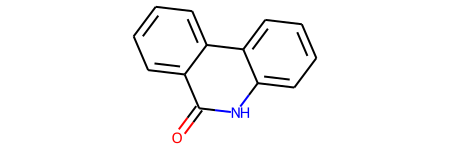

In [ ]:
Chem.MolFromSmiles("O=c1[nH]c2ccccc2c2ccccc12")

In [ ]:
# train_df, valid_df, test_df = generateMurcoScaffold("BBBP")
# print(valid_df)

In [ ]:
# pd.get_option("display.max_rows")
# train_df['MurckoScaffold']
# from IPython.display import display


# pd.options.display.max_columns = None
# display(train_df['MurckoScaffold'])

In [ ]:
# train_df, valid_df, test_df = generateMurcoScaffold("BBBP")

RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:00] WARNING: not r

In [ ]:
# train_df, valid_df, test_df = generateMurcoScaffold("BBBP")
# train_scaff = train_df["MurckoScaffold"]
# valid_scaff = valid_df["MurckoScaffold"]
# len(set(train_scaff)), len(set(valid_scaff)), len(train_df), len(valid_df)

In [ ]:
train_df, valid_df, test_df = generateMurcoScaffold("BBBP")

NameError: name 'generateMurcoScaffold' is not defined

In [ ]:
# train_df, valid_df, test_df = generateMurcoScaffold("BACE")
# train_scaff = train_df["MurckoScaffold"]
# valid_scaff = valid_df["MurckoScaffold"]
# len(set(train_scaff)), len(set(valid_scaff)), len(train_df), len(valid_df)

In [ ]:
len(set(list(set(train_scaff)) + list(set(valid_scaff))))

519

In [ ]:
# pandas.set_option('display.max_rows', None)


In [ ]:
# train_df, valid_df, test_df = generateMurcoScaffold("HIV")
# train_scaff = train_df["MurckoScaffold"]
# valid_scaff = valid_df["MurckoScaffold"]
# len(set(train_scaff)), len(set(valid_scaff)), len(train_df), len(valid_df)

In [ ]:
# dataset_name = "BBBP"

# def generateRecapDecompose(dataset_name):
        
#     path = f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/{dataset_name}/{dataset_name}/"
#     train_df = pd.read_csv(f"{path}train_{dataset_name}.csv")
#     valid_df = pd.read_csv(f"{path}valid_{dataset_name}.csv")
#     test_df = pd.read_csv(f"{path}test_{dataset_name}.csv")

#     train_scaff = []
#     valid_scaff = []
#     train_scaff = []

#     include_chirality = False

#     for i in range(len(train_df)):
#             mol = Chem.MolFromSmiles(train_df['ids'][i])
#             train_scaff.append(RecapDecompose(mol=mol))
#     train_df["RecapDecompose"] = train_scaff



#     for i in range(len(valid_df)):
#             mol = Chem.MolFromSmiles(valid_df['ids'][i])
#             valid_scaff.append(RecapDecompose(mol=mol))
#     valid_df["RecapDecompose"] = valid_scaff

#     return train_df, valid_df


In [ ]:
# train_df, valid_df = generateRecapDecompose("BBBP")
# train_scaff = train_df["RecapDecompose"]
# valid_scaff = valid_df["RecapDecompose"]
# len(set(train_scaff)), len(set(valid_scaff)), len(train_df), len(valid_df)

In [ ]:
# Chem.MolFromSmiles("C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl")

In [ ]:
# mol = Chem.MolFromSmiles("C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl")
# a = RecapDecompose(mol=mol)

In [ ]:
# from rdkit.Chem.Recap import RecapDecompose

In [ ]:
# a.children

In [ ]:
# Chem.MolFromSmiles("C(C)(C)C")
#mol

In [ ]:
import pandas as pd
import wandb
import aim

In [ ]:
df = pd.read_csv("/home/gayane/BartLM/Bart/chemical/table_of_results/SIDER_0_r3f.csv")

In [ ]:
df

,lr,dropout,noise_type,r3f_lambda,best_val_AUC,best_SWA_AUC
0,0.000005,0.1,uniform,0.1,0.704,0.687
1,0.000005,0.1,uniform,0.5,0.704,0.682
2,0.000005,0.1,uniform,1.0,0.695,0.690
3,0.000005,0.1,uniform,5.0,0.679,0.683
4,0.000005,0.2,uniform,0.1,0.697,0.677
...,...,...,...,...,...,...
67,0.000030,0.2,normal,5.0,0.665,0.669
68,0.000030,0.3,normal,0.1,0.638,0.692
69,0.000030,0.3,normal,0.5,0.662,0.677
70,0.000030,0.3,normal,1.0,0.652,0.654


In [ ]:
wandb.login()

True

In [ ]:
total_runs = 5
for i in range(len(df)):
  # 🐝 1️⃣ Start a new run to track this script
  wandb.init(
      # Set the project where this run will be logged
      project="SIDER_0_panel", 
      # We pass a run name (otherwise it’ll be randomly assigned, like sunshine-lollypop-10)
      name=f"""SIDER_0_lr_{df["lr"][i]}_dropout_{df["dropout"][i]}_noise_type_{df["noise_type"][i]}_r3f_{df["r3f_lambda"][i]}""", 
      # Track hyperparameters and run metadata
      config={
      "lr": df["lr"][i],
      "dropout": df["dropout"][i],
      "noise_type": df["noise_type"][i],
      "r3f_lambda": df["r3f_lambda"][i],
      "best_val_auc": df["best_val_AUC"][i],
      "loss": df["best_SWA_AUC"][i]
      })
  
    # This simple block simulates a training loop logging metrics
  
      
      # 🐝 2️⃣ Log metrics from your script to W&B
      # wandb.log({"best_val_auc": df["best_val_AUC"][i], "loss": df["best_SWA_AUC"][i]})
      
  # Mark the run as finished
  wandb.finish()

wandb: ERROR Error communicating with wandb process
wandb: ERROR try: wandb.init(settings=wandb.Settings(start_method='fork'))
wandb: ERROR or:  wandb.init(settings=wandb.Settings(start_method='thread'))
wandb: ERROR For more info see: https://docs.wandb.ai/library/init#init-start-error


Problem at: <ipython-input-23-1811718814a4> 4 <cell line: 2>


UsageError: Error communicating with wandb process
try: wandb.init(settings=wandb.Settings(start_method='fork'))
or:  wandb.init(settings=wandb.Settings(start_method='thread'))
For more info see: https://docs.wandb.ai/library/init#init-start-error

In [ ]:
{"best_val_auc": df["best_val_AUC"][0], "loss": df["best_SWA_AUC"][0]}

{'best_val_auc': 0.704, 'loss': 0.687}

In [ ]:
import json


path = '/home/gayane/BartLM/fairseq/scripts/datasets.json'
with open(path) as f:
    data = json.load(f)
    j = dict()
    for i in range():
        j["BBBP_"+str(i)] = data["BBBP"]
        with open(path, 'w') as f:
            json.dump(j, f, indent=2)




TypeError: range expected at least 1 argument, got 0

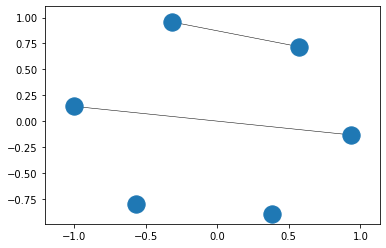

In [6]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def add_edge_to_graph(G, e1, e2):
    G.add_edge(e1, e2)


nodes = np.arange(6)
G = nx.Graph()
G.add_nodes_from(nodes)
pos = [(1, 10), (8, 10), (10, 8), (7, 4), (3, 1), (11,2)]  # (x,y) points
pos = nx.spring_layout(G)
edges = [(0, 4),(1, 2)]  # (v1,v2, weight)
G.add_edges_from(edges)

# you want your own layout
# pos = nx.spring_layout(G)

# add axis
fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax, with_labels=False, width=0.5)

edges = [(1, 4), (2, 3), (2, 4), (3, 4)]

for i in range(len(edges)):
    add_edge_to_graph(G, edges[i][0], edges[i][1])

# nx.draw(G, pos=pos,  edge_color="white", alpha=0.5, ax=ax)0

# nx.draw(G, pos=pos,  node_color="blue", alpha=0, ax=ax)

# nx.draw(G, pos=pos, node_size=0, ax=ax, )  # draw nodes and edges
# nx.draw_networkx_labels(G, pos=pos)  # draw node labels/names
# draw edge weights
# labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, ax=ax)
plt.axis("on")

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.show()

In [2]:
# G = nx.complete_graph(9)

# print(G.size())
# G = nx.complete_graph(range(5))
# list(G.nodes())
# nx.draw_networkx_nodes(G, pos=pos)
# a = nx.draw_networkx_edges(G, pos=pos, edge_cmap=plt.cm.magma, width=edge_widths)
# # G = nx.complete_graph(4, nx.DiGraph())
# # G.is_directed()

In [161]:
def choose_n_to_k(n):
    l = list()
    for i in range(1, n+1):
        for j in range(i+1, n+1):
            l.append((i-1, j-1))
    return l

In [162]:
# nx.draw(G,  edge_color="red", pos=pos)
# pos, edges, points
data = {
        "x": np.array([-0.45382364,  0.17571224, 0, 1, 1]),
        "y": np.array([-0.64224069,  0.17753437, 1, 0, 1]),
        "label": np.array([0, 1, 1, 0, 1]),
        "dataset": np.array([0, 0, 1, 0, 1])
    }
df = pd.DataFrame(data=data)

In [166]:
df = pd.DataFrame(data=data)

nodes = np.arange(df.shape[0])

G = nx.Graph()
G.add_nodes_from(nodes)
pos = [[df['x'][i], df['y'][i]] for i in range(df.shape[0])]

In [164]:
pos[0][0]

-0.45382364

---> [0, 1, 3]
---> [2, 4]
[(0, 1), (0, 3), (1, 3), (2, 4)]


<ipython-input-173-4eccda3afae0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['idx'] = idx
<ipython-input-173-4eccda3afae0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['idx'] = idx


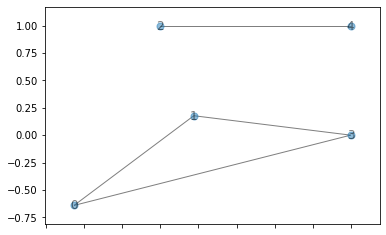

In [173]:
df = pd.DataFrame(data=data)

nodes = np.arange(df.shape[0])

G = nx.Graph()
G.add_nodes_from(nodes)
pos = [[df['x'][i], df['y'][i]] for i in range(df.shape[0])]
all_datasets = list(set(df["dataset"]))
edges = []
for i in all_datasets:
    A = df[df['dataset'] == i]
    print("--->", A.index.to_list())
    n_ = A.shape[0] # number of scaffold types
    idx = [k for k in range(n_)]
    A['idx'] = idx
    ed_p = A.index.to_list()
    # print(ed_p)
    for i in range(len(ed_p)):
        for j in range(i + 1, len(ed_p)):

            edges.append((ed_p[i], ed_p[j]))
    

    # print(edges)

print(edges)
for i in range(len(edges)):

    add_edge_to_graph(G, edges[i][0], edges[i][1])
fig, ax = plt.subplots()

nx.draw_networkx(G, pos=pos, ax=ax, node_size=50, alpha=0.5, node_shape='o')

plt.axis("on")

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=False)
plt.show()

In [132]:
A = df[df['dataset'] == i]
n_ = A.shape[0] # number of scaffold types
idx = [k for k in range(n_)]
A['idx'] = idx
A.index

<ipython-input-132-64d59d6d2371>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A['idx'] = idx


2

In [ ]:

G = nx.Graph()
all_datasets = list(set(df["dataset"]))
pos_ = []
s = 0 
for i in all_datasets:
    A = df[df['dataset'] == i]
    n_ = A.shape[0] # number of scaffold types
    idx = [k for k in range(n_)]
    A.reindex(idx, axis='index')

    pos = []
    for j in range(n_):
        G.add_node(s +j)    
    
    points = [[['x'][k], A['y'][k]] for k in range(n_)]
    pos_.append(points)
    s = s + n_
    edges = choose_n_to_k(n_) # (v1,v2)


# for j in range(s, len(edges) + s):
#     print(points[edges[j-s][0]], points[edges[j-s][1]]  )
#     x, y = points[j][edges[j-s][0]], points[j][edges[j-s][1]]
#     add_edge_to_graph(G, points[edges[j-s+1][0]], points[edges[j-s+1][1]])
#     pos=nx.spring_layout(G)
#     nx.draw(G, pos=pos,  edge_color="white", alpha=0.5, ax=ax)

#     nx.draw(G, pos=pos,  node_color="blue", alpha=0, ax=ax)
# s = s + n
        

IndexError: list index out of range

In [21]:
for i in all_datasets:
    A = df[df['dataset'] == i]
    n_ = A.shape[0] # number of scaffold types
    pos = []
    # for j in range(n_):
    #     G.add_node(s +j)    
    
    points = [[A['x'][k], A['y'][k]] for k in range(n_-1)]
    pos.append(points)

KeyError: 0

Error: Session cannot generate requests

In [ ]:
from fairseq.data.data_utils import load_indexed_dataset
from fairseq.models.bart import BARTModel
from fairseq.data import Dictionary
import torch.nn.functional as F 

import torch
import torch.nn as nn

import pandas as pd
import numpy as np
from tqdm import tqdm
import json
import os
# os.environ['MKL_THREADING_LAYER'] = 'GNU'
# os.system('CUDA_LAUNCH_BLOCKING=0')

dataset_name = 'BBBP'
# dataset = dataset_name if dataset_name in set(["BBBP", "BACE", "HIV"]) else f"{dataset_name}_{args.subtask}"
dataset = dataset_name

store_path = "/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data"
model = f"{store_path}/{dataset}/processed"

with open('/home/gayane/BartLM/captum/fairseq/scripts/datasets.json') as f:
    datasets_json = json.load(f)
dataset_js = datasets_json[dataset]
task_type = dataset_js['type']

if task_type == "regression":
    mi = dataset_js['minimum']
    ma = dataset_js['maximum']

os.system(f"mkdir -p {store_path}/{dataset}/")
os.system(f"mkdir -p {store_path}/{dataset}/processed/")
os.system(f"mkdir -p {store_path}/{dataset}/processed/input0/")
os.system(f"mkdir -p {store_path}/{dataset}/processed/label/")

warmup = 163
totNumUpdate = 1020
lr = '3e-5'
chkpt_path = '/mnt/good/gayane/data/chkpt/BBBP_bs_16_dropout_0.1_lr_3e-5_totalNum_1020_warmup_163_noise_type_uniform_r3f_lambda_1.0/checkpoint_best.pt'
# chkpt_path = f"/mnt/good/gayane/data/chkpt/{dataset}_bs_16_lr_{lr}_totalNum_{totNumUpdate}_warmup_{warmup}/checkpoint_last.pt"
print(chkpt_path)  # BACE_bs_16_lr_3e-5_totalNum_1135_warmup_181/ in test 
bart = BARTModel.from_pretrained(model,  checkpoint_file = chkpt_path, 
                                 bpe="sentencepiece",
                                 sentencepiece_model="/home/gayane/BartLM/Bart/chemical/tokenizer/chem.model")
bart.eval()
bart.cuda(device=0)


Error: Session cannot generate requests

In [ ]:
data_type = 'train'

input_dict = Dictionary.load(f"{store_path}/{dataset}/processed/input0/dict.txt")
smiles = list(load_indexed_dataset(
    f"{store_path}/{dataset}/processed/input0/{data_type}", input_dict))


test_label_path = f"{store_path}/{dataset}/processed/label/{data_type}"

if task_type == 'classification':
    
    target_dict = Dictionary.load(f"{store_path}/{dataset}/processed/label/dict.txt")
    targets = list(load_indexed_dataset(test_label_path, target_dict))
elif task_type == 'regression':
    with open(f'{test_label_path}.label') as f:
        lines = f.readlines()
        targets = [float(x.strip()) for x in lines]
if task_type == 'classification':
    if len(dataset_js["class_index"])>1:
        target_dict = list()
        targets_list = list()
        for i in range(len(dataset_js["class_index"])):
            target_dict.append(Dictionary.load(f"{store_path}/{dataset}_{i}/processed/label/dict.txt"))
            targets_list.append(list(load_indexed_dataset(test_label_path[i], target_dict[i])))
        
    else: 
        target_dict = Dictionary.load(f"{store_path}/{dataset}/processed/label/dict.txt")
        targets = list(load_indexed_dataset(test_label_path, target_dict))
elif task_type == 'regression':
    with open(f'{test_label_path}.label') as f:
        lines = f.readlines()
        targets = [float(x.strip()) for x in lines]

y_pred = []
y = []
sm = []
for i, (smile, target) in tqdm(list(enumerate(zip(smiles, targets)))):
    smile = torch.cat((torch.cat((torch.tensor([0]), smile[:126])), torch.tensor([2])))  
    if task_type =="classification":
        output = bart.predict('sentence_classification_head', smile)
        target = target[0].item()
        y_pred.append(output[0][1].exp().item())
        y.append(target - 4)
        sm.append(bart.decode(smile))
        
    elif task_type == "regression":
        output = bart.predict('sentence_classification_head', smile, return_logits=True)
        y_pred.append(output[0][0].item())
        y.append(target)
        sm.append(bart.decode(smile))


Error: Session cannot generate requests

In [ ]:
smi = []



_input = pd.read_csv(f"/home/gayane/BartLM/Bart/chemical/checkpoints/evaluation_data/BBBP/raw/{data_type}.input", names=['SMILES'], header=None)

li = _input.values
smile = bart.encode(_input.values[5][0]).to("cuda")
print(li[0])
last_layer_features = bart.extract_features(smile)

